In [1]:
# 메모리내 변수 제거

all = [var for var in globals() if var[0] != "_"]   # globals() 목록의 첫글자가 _ 로 시작하지 않는 자료의 리스트만 가져와서
for var in all:
    del globals()[var]

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import wordcloud
import nltk

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
train1 = pd.read_csv('c:/data/project/train.csv')
test = pd.read_csv('c:/data/project/test.csv')

In [4]:
train = train1.copy()
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [5]:
train.drop(columns=['ID', 'first_party', 'second_party'], inplace=True)
train.head()

,facts,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Ramon Nelson was riding his bike when he suffe...,0
2,An Alabama state court convicted Billy Joe Mag...,1
3,Victor Linkletter was convicted in state court...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [6]:
train['first_party_winner'].value_counts()

first_party_winner
1    1649
0     829
Name: count, dtype: int64

In [7]:
train_target = pd.DataFrame(train, columns=['first_party_winner'])
train_target

,first_party_winner
0,1
1,0
2,1
3,0
4,1
...,...
2473,1
2474,1
2475,0
2476,0


In [ ]:
# train_target = train['first_party_winner']
# train_nlp = train['facts']
# train_nlp = pd.DataFrame(train_nlp, columns=['facts'])
# train_nlp
#train_nlps['facts'] = train_nlps['facts'].str.replace(r'<[^<>]*>', '', regex=True)
#train_nlps

In [8]:
train_nlp = train['facts']
train_nlp = pd.DataFrame(train_nlp, columns=['facts'])
train_nlp['facts'] = train_nlp['facts'].str.replace(r'<[^<>]*>', '', regex=True)
train_nlp

,facts
0,"On June 27, 1962, Phil St. Amant, a candidate ..."
1,Ramon Nelson was riding his bike when he suffe...
2,An Alabama state court convicted Billy Joe Mag...
3,Victor Linkletter was convicted in state court...
4,"On April 24, 1953 in Selma, Alabama, an intrud..."
...,...
2473,Congress amended the Clean Air Act through the...
2474,"Alliance Bond Fund, Inc., an investment fund, ..."
2475,"In 1992, the District Court sentenced Manuel D..."
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per..."


In [ ]:
#!pip install nltk

In [ ]:
#nltk.download()

In [ ]:
# from nltk.tokenize import WhitespaceTokenizer

# corpus = train_nlp['facts']
# Tokenizer=WhitespaceTokenizer()
# lst_tokens = Tokenizer.tokenize(str(corpus))
# lst_tokens
# # 공백 단위로 문자 쪼개기

#### 토큰화

In [9]:
import nltk

corpus = train_nlp["facts"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
# 어절 별로 키워드 반환

ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

lst_tokens

['On',
 'June',
 '27',
 ',',
 '1962',
 ',',
 'Phil',
 'St.',
 'Amant',
 ',',
 'a',
 'candidate',
 'for',
 'public',
 'office',
 ',',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'Baton',
 'Rouge',
 ',',
 'Louisiana',
 '.',
 'During',
 'this',
 'speech',
 ',',
 'St.',
 'Amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'Communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activities',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'Teamsters',
 'Union',
 '.',
 'Finally',
 ',',
 'St.',
 'Amant',
 'implicated',
 'Herman',
 'Thompson',
 ',',
 'an',
 'East',
 'Baton',
 'Rouge',
 'deputy',
 'sheriff',
 ',',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'Teamsters',
 'Union',
 'and',
 'St.',
 'Amant',
 '’',
 's',
 'political',
 'opponent',
 '.',
 'Thompson',
 'successfully',
 'sued',
 'St.',
 'Amant',
 'for',
 'defamation',
 '.',
 'Louisiana',
 '’',
 's',
 'First',
 'Circuit',
 'Court',
 'of',
 'Appeals',
 'reve

#### 불용어 사전 정의 (사용자 지정 & 기본 제공[english])

In [10]:
import re

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None, user_stopwords=None): 
## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
        
    if user_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    user_stopwords]
                        
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [38]:
lst_stopwords = nltk.corpus.stopwords.words("english")
# NLTK가 정의한 영어 불용어 리스트를 리턴
#lst_stopwords

In [39]:
train_nlp["facts_lst_stopwords"] = train_nlp["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
train_nlp

,facts,facts_lst_stopwords
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding bike suffered lethal blow ...
2,An Alabama state court convicted Billy Joe Mag...,alabama state court convicted billy joe magwoo...
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state court eviden...
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...
...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air act energy policy a...
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...
2475,"In 1992, the District Court sentenced Manuel D...",1992 district court sentenced manuel peguero 2...
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...


In [ ]:
corpus = train_nlp["facts"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
# 어절 별로 키워드 반환

ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()


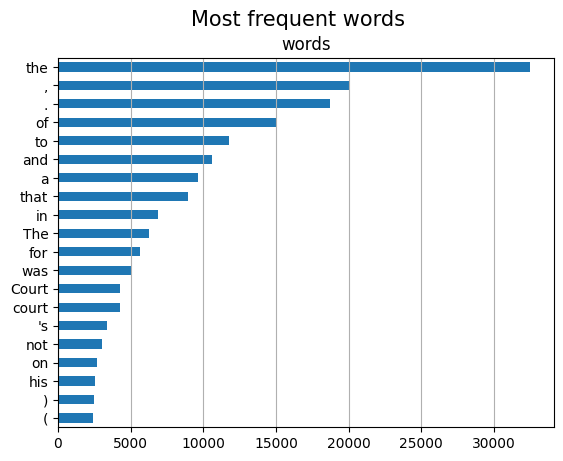

<Figure size 3000x2400 with 0 Axes>

,Word,Freq
0,the,32500
1,",",20104
2,.,18697
3,of,15057
4,to,11798
...,...,...
21425,patentee,1
21426,localize,1
21427,spurious,1
21428,bar-coded,1


In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
figure(figsize=(30, 24))

dic_words_freq = nltk.FreqDist(lst_tokens)
freq_graph = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
freq_graph
freq_graph.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="words", ax=ax, 
                  legend=False).grid(axis='x')

ax.set(ylabel=None)
#plt.xscale('log')
plt.show()
freq_graph

In [34]:
freq_graph['Log_Freq'] = np.log1p(freq_graph['Freq'])
freq_graph

# 기존 freq 값은 너무 커서 확인이 어려우므로 log scale을 취함 -> log 값 변환해도 결과가 같음 : 사용하지 않아도 됨

,Word,Freq,Log_Freq
0,the,32500,10.389026
1,",",20104,9.908724
2,.,18697,9.836172
3,of,15057,9.619665
4,to,11798,9.375770
...,...,...,...
21425,patentee,1,0.693147
21426,localize,1,0.693147
21427,spurious,1,0.693147
21428,bar-coded,1,0.693147


In [35]:
# freq_graph
# fig, ax = plt.subplots(figsize=(10,6))
# fig.suptitle("Most frequent words", fontsize=15)

# import seaborn as sns

# sns.distplot(freq_graph['Log_Freq'])

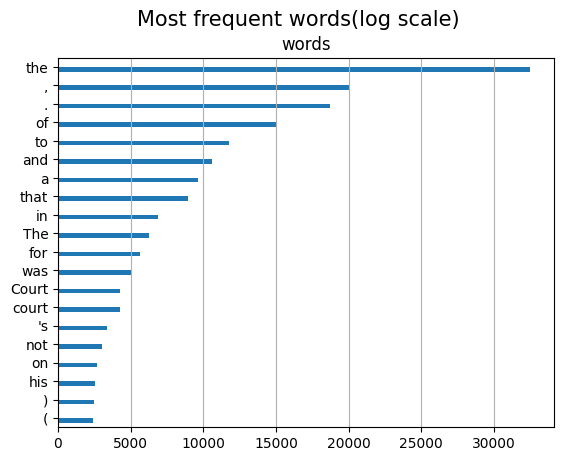

<Figure size 3000x2400 with 0 Axes>

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words(log scale)", fontsize=15)
figure(figsize=(30, 24))

freq_graph.set_index("Word").iloc[:20,:].sort_values(by="Log_Freq").plot(
                  kind="barh", title="words", ax=ax, 
                  legend=False).grid(axis='x')

ax.set(ylabel=None)
plt.show()

In [ ]:
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])

dtf_uni

stop_words=[]
for word, freq in dic_words_freq.most_common():
    if freq == 1:
        #print(word)
        stop_words.append(word)
len(stop_words)
stop_words

In [ ]:
# user_stopwords = ["law", "court", "case", "plaintiff", "defendant", "judge", "trial", "jurisdiction", "evidence", "witness", "proceeding", "litigation", "party", "motion", "appeal", "action", "suit", "claim", "issue", "fact", "hearing", "counsel", "judgment", "order", "allegation", "argument", "brief", "charge", "complaint", "contract", "crime", "decision", "defense", "document", "file", "find", "hold", "injunction", "instruction", "lawyer", "legal", "liability", "matter", "notice", "opinion", "party", "plea", "point", "policy", "practice", "present", "prosecution", "record", "rule", "sentence", "statute", "testimony", "verdict", 'james', 'bike', 'named',"section", "act", "article", "chapter", "provision", "paragraph", "amendment", "code", "regulation", "statutory", "subsection", "constitution", "legislation", "ordinance", "regulatory", "rulemaking", "title", "enactment", "resolution", "treaty", "administrative", "bylaw",  "legislative", "prescription", "ratification", "repeal", "statutorily", "adjudicate", "adjudication", "arbitrate", "arbitration", "conciliation", "decree", "litigate", "mediation", "remand", "tribunal", "appellate", "affirm", "overrule", "reversal", "vacate", "writ", "certiorari", "mandamus", "subpoena", "arraignment", "indictment", "misdemeanor", "probation", "restitution", "summons", "verdict", "acquittal", "bail", "contempt", "conviction", "felony", "parole", "plea", "prosecutor", "sentence", "attorney", "barrister", "counsel", "juror", "litigator", "magistrate", "prosecutor", "solicitor", "stipulation", "testator", "trustee", "executor", "heir", "lease", "lessor", "lessee", "mortgagee", "mortgagor", "assignee", "assignor", "debtor", "creditor", "insurer", "insured", "beneficiary", "fiduciary", "principal", "agent"]
# words = [
#     'June', '27', '1962', 'Phil', 'St.', 'Amant', 'Baton', 'Rouge', 'Louisiana', 'During', 'this', 'television',
#     'speech', 'in', 'accused', 'his', 'political', 'opponent', 'being', 'and', 'of', 'involved', 'in', 'criminal',
#     'activities', 'with', 'the', 'head', 'of', 'local', 'Finally', 'implicated', 'Herman', 'Thompson', 'an', 'East',
#     'Baton', 'Rouge', 'deputy', 'sheriff', 'in', 'a', 'scheme', 'to', 'move', 'money', 'between', 'Teamsters', 'Union',
#     's', 'political', 'Thompson', 'successfully', 'sued', 'for', 'defamation', 'First', 'Circuit', 'Court', 'Appeals',
#     'reversed', 'holding', 'did', 'not', 'show', 'acted', 'with', 'malice', 'Thompson', 'then', 'appealed', 'Supreme',
#     'Court', 'Louisiana', 'court', 'that', 'although', 'public', 'figures', 'forfeit', 'some', 'their', 'Amendment',
#     'protection', 'from', 'defamation', 'accused', 'crime', 'utter', 'disregard', 'whether', 'remarks', 'were', 'true',
#     'uninhibited', 'robust', 'debate', 'rather', 'than', 'an', 'open', 'season', 'to', 'shoot', 'down', 'good', 'name',
#     'of', 'anyone', 'who', 'happens', 'be', 'servant', 'Ramon', 'Nelson', 'riding', 'his', 'bike', 'suffered', 'lethal',
#     'blow', 'back', 'with', 'baseball', 'bat', 'After', 'two', 'eyewitnesses', 'identified', 'Lawrence', 'Owens',
#     'array', 'photos', 'lineup', 'tried', 'convicted', 's', 'death', 'Because', 'carrying', 'cocaine', 'crack',
#     'potentially', 'for', 'distribution', 'judge', 'bench', 'trial', 'ruled', 'probably', 'also', 'drug', 'dealer',
#     'trying', 'knock', 'off', 'found', 'guilty', 'first-degree', 'murder', 'sentenced', 'years', 'prison', 'filed',
#     'petition', 'writ', 'habeas', 'corpus', 'grounds', 'constitutional', 'due', 'process', 'violated', 'during',
#     'argued', 'eyewitness', 'identification', 'should', 'have', 'been', 'inadmissible', 'based', 'unreliability',
#     'impermissibly', 'inferred', 'm']

# stopwords=set(user_stopwords+words)
# stopwords

In [ ]:
# train_nlp["facts_clean"] = train_nlp["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords, user_stopwords=stop_words))
# train_nlp

In [ ]:
#train_nlp['facts_clean'] == train_nlp['facts_clean'] 

In [ ]:
train_nlp2 = pd.concat([train_nlp,train_target['first_party_winner']],axis=1, join='inner')

print(train_nlp2["first_party_winner"].value_counts())
train_nlp2

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
y=1
corpus1 = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus1.str.cat(sep=" "))

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
figure(figsize=(30, 24))

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni1 = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni[40:60]
dtf_uni1.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax, 
                  legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()    

dtf_uni1

In [ ]:
y=0
corpus0 = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus0.str.cat(sep=" "))

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
figure(figsize=(30, 24))

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni0 = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni[40:60]
dtf_uni0.set_index("Word").iloc[:50,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax, 
                  legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()    

dtf_uni0

In [ ]:
corpus0

In [ ]:
# y=0
# corpus = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
# lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

# dic_words_freq = nltk.FreqDist(lst_tokens)
# dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni

In [ ]:
# !pip install wordcloud

In [ ]:
wc1 = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc1 = wc1.generate(str(dtf_uni1))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc1, cmap=None)
plt.show()

In [ ]:
wc0 = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc0 = wc0.generate(str(dtf_uni0))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc0, cmap=None)
plt.show()

## Data Preprocessing

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()

In [ ]:
# vectorizer = TfidfVectorizer()

# def get_vector(vectorizer, df, train_mode):
#     if train_mode:
#         X_facts = vectorizer.fit_transform(df['facts'])
#     else:
#         X_facts = vectorizer.transform(df['facts'])
#     X_party1 = vectorizer.transform(df['first_party'])
#     X_party2 = vectorizer.transform(df['second_party'])
    
#     X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
#     return X

# X_train = get_vector(vectorizer, train_nlp, True)
# Y_train = train_nlp2["first_party_winner"]
# X_test = get_vector(vectorizer, test, False)

In [ ]:
train_nlp2

xfeatures = train_nlp2['facts_clean']
ylabel = train_nlp2['first_party_winner']
# xfeatures
# ylabel

In [ ]:
corpus

#### 불용어 처리 (추가)

In [ ]:
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
#print(tfidf.transform(corpus))
tfidf_matrix.shape
# 2478개의 판결문을 표현하기 위해 총 17459개의 단어가 사용됨 -> 불용어 전처리를 한 상태에서

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()

X_train, X_test, y_train, y_test = train_test_split(xfeatures,ylabel, test_size=0.25)

In [ ]:
X_train.count(), X_test.count(), y_train.count(), y_test.count()

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Define Model & Train

#### LogisticRegression

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

In [ ]:
# lr.predict(X_train)
# lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

#### XGBoost

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
                      booster = 'gbtree',
                      scale_pos_weight=5,
                      learning_rate=0.01,  
                      colsample_bytree = 0.7,
                      subsample = 0.5,
                      max_delta_step = 3,
                      reg_lambda = 2,
                      objective='binary:logistic',
                      n_estimators=818, 
                      max_depth=8,
                     )


xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict_proba(X_test)
y_pred

In [ ]:
xgb.score(X_test, y_test)

In [ ]:
# tfidf_matrix = vectorizer.fit_transform(train['facts'])

# from sklearn.metrics.pairwise import cosine_similarity
# # 첫 번째와 두 번째 문장 비교
# cos_similar = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
# print("코사인 유사도 측정")
# print(cos_similar)

In [ ]:
tfidfv = TfidfVectorizer().fit(train['facts'])
print(tfidfv.vocabulary_)
print("="*100)
print(tfidfv.transform(train['facts']).toarray())
print("="*100)
print(tfidfv.fit_transform(train['facts']).toarray())

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
tfidf_matrix = tfidfv.fit_transform(train['facts'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

In [ ]:
tfidfv.vocabulary_.keys()

In [ ]:
#word_list = [i for i in sorted(tfidfv.vocabulary_.keys())]
word_list=tfidfv.vocabulary_.keys()
# vec_X_train을 DataFrame 화
pd.DataFrame(tfidf_matrix.toarray(), columns=word_list)
#pd.DataFrame(cosine_sim, columns=word_list)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

## Inference & Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
pred = model.predict(X_test)

In [ ]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')